In [26]:
from pl_bolts.models.gans import GAN
from pl_bolts.datamodules.mnist_datamodule import MNISTDataModule

import pytorch_lightning as pl

import torch
from skimage import io

import torch.nn as  nn

import types
from typing import Callable
from torchvision import transforms as transform_lib

In [27]:
%load_ext autoreload
%autoreload 2

In [28]:
pl.seed_everything(42)

Global seed set to 42


42

In [29]:
def show_image(image: torch.Tensor):
    io.imshow(image.detach().permute(1, 2, 0).numpy())

In [30]:
dm = MNISTDataModule(
    './MNIST/',
    0.1,
    4,
    True,
    300,
    shuffle=True,
    pin_memory=True,
    drop_last=True,
)

In [31]:
dm.setup()

In [32]:
m = GAN(1, 28, 28)

In [37]:
trainer = pl.Trainer(
    gpus=1,
    auto_select_gpus=True,
    benchmark=True,
    max_epochs=500
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [38]:
%%time
trainer.fit(m, dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | generator     | Generator     | 1.5 M 
1 | discriminator | Discriminator | 1.5 M 
------------------------------------------------
2.9 M     Trainable params
0         Non-trainable params
2.9 M     Total params
11.717    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

CPU times: user 26min 22s, sys: 2min 44s, total: 29min 6s
Wall time: 37min 15s


In [98]:
z = torch.rand(32, 32)

In [99]:
x = m(z)

In [115]:
i = 10

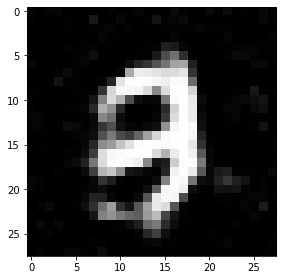

In [116]:
show_image((x[i] + 1) / (x[i] + 1).max())